<a href="https://colab.research.google.com/github/JuanM-GG/sistemas-dinamicos-R/blob/main/modelo_monod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Título: Modelo 1 Monod

Autor: Juan Manuel Gutiérrez García

Afiliación: Instituto Tecnológico de Morelia 

Fecha: Enero 2021

# Modelado de ecuaciones

El modelo dinámico se desarrolla escribiendo balances de materiales en la biomasa (células) y el sustrato (fuente de alimentación para las células). La biomasa crece alimentándose del sustrato.

## Balance de materia para la biomasa

Escribimos el balance de materia como:

$$tasa\ de\ acumulación\ =\ entrada\ por\ flujo\ -\ salida\ por\ flujo\ +\ generación$$

<a id='equation-la-se2'></a>
$$
\frac{d(Vx)}{dt} = F_{in}x_{f} - Fx + V r_1 \tag{1}
$$



donde $x_f$ es la concentración de biomasa en la corriente de alimentación y $ F $ es el caudal volumétrico.

## Balance de materia para el sustrato

$$tasa\ de\ acumulación\ =\ entrada\ por\ flujo\ -\ salida\ por\ flujo\ \ consumo$$

<a id='equation-la-se2'></a>

$$
\frac{d(Vs)}{dt} = F_{in}s_{f} - Fs + V r_2 \tag{2}
$$

donde $s_f$ es la concentración de sustrato en la corriente de alimentación

## Balance de materia para el producto

$$tasa\ de\ acumulación\ =\ entrada\ por\ flujo\ -\ salida\ por\ flujo\ \ consumo$$

<a id='equation-la-se2'></a>

$$
\frac{d(Vp)}{dt} = F_{in}p_{f} - Fp + V r_3 \tag{3}
$$

donde $p_f$ es la concentración de producto en la corriente de alimentación


## Tasa de crecimiento específica

La velocidad de reacción (masa de células generadas / tiempo * volumen) se escribe normalmente como


$$
r_1 = \mu x 
$$

donde $ \mu $ es el coeficiente de tasa de crecimiento específico. Podemos pensar en $\mu$ como similar a una constante de velocidad de reacción de primer orden; sin embargo, $\mu$ no es constante, es una función de la concentración de sustrato. Las unidades de $\mu$ son $tiempo^{- 1} $.

## Rendimientos

Existe una relación entre la tasa de generación de biomasa y la tasa de consumo de sustrato. Se define $ Y_{xs} $ como el rendimiento biomasa-sustrato, es decir, la masa de células producidas por masa de sustrato consumido.

<a id = 'equation-la-se2'></a>
$$
Y_{xs} = \frac{masa\ de\ células\ producida}{masa\ de\ sustrato\ consumido} = \frac{r_1}{r_2} \tag{4}
$$

de (4) podemos escribir:

<a id = 'equation-la-se2'></a>
$$
r_2 =  \frac{r_1}{Y_{xs}}\tag{5}
$$

<a id = 'equation-la-se2'></a>
$$
r_2 =  \frac{\mu x}{Y}\tag{6}
$$

asumimos en el análisis posterior que $ Y_{xs} $ es constante

De manera similar se define $Y_{px}$ como el rendimiento producto-biomasa.

<a id = 'equation-la-se2'></a>
$$
r_3 =  Y_{px} \mu x\tag{7}
$$


## Tasa de dilución

Suponiendo un reactor de volumen constante, podemos escribir (1), (2) y (3) como

<a id = 'equation-la-se2'></a>
$$
\frac{dx}{dt} =  \frac{F}{V}x_f - \frac{F}{V}x + r_1  \tag{8}
$$

<a id = 'equation-la-se2'></a>
$$
\frac{ds}{dt} =  \frac{F}{V}s_f - \frac{F}{V}s - r_2  \tag{9}
$$

<a id = 'equation-la-se2'></a>
$$
\frac{dp}{dt} =  \frac{F}{V}p_f - \frac{F}{V}p + r_3  \tag{10}
$$

Definiendo $ F / V $ como $ D $, la tasa de dilución, y usando la expresión de tasa en (5) y (7) encontramos.

<a id = 'equation-la-se2'></a>
$$
\frac{dx}{dt} =  Dx_f - Dx + \mu x  \tag{11}
$$

<a id = 'equation-la-se2'></a>
$$
\frac{ds}{dt} =  Ds_f - Ds - \frac{\mu x}{Y_{xs}}  \tag{12}
$$

<a id = 'equation-la-se2'></a>
$$
\frac{dp}{dt} =  Dp_f - Dp + Y_{px}*\mu x  \tag{13}
$$

Generalmente, se supone que no hay biomasa ni producto en la corriente de alimentación, por lo que $ x_f = 0 $ y $p_f = 0$. Las ecuaciones de modelado del biorreactor normalmente se escriben de la siguiente forma:

<a id = 'equation-la-se2'></a>
$$
\frac{dx}{dt} =   (\mu-D) x  \tag{14}
$$

<a id = 'equation-la-se2'></a>
$$
\frac{ds}{dt} =  D(s_f - s) - \frac{\mu x}{Y_{xs}}  \tag{15}
$$

<a id = 'equation-la-se2'></a>
$$
\frac{dp}{dt} =  Y_{px} \mu x - D p \tag{16}
$$

La tasa de dilución (D) es el inverso del tiempo de residencia del reactor y tiene unidades de $ tiempo ^ {- 1} $.

## Expresiones de tasa de crecimiento

El coeficiente de la tasa de crecimiento no suele ser constante. Se han desarrollado varias relaciones funcionales entre el coeficiente de tasa de crecimiento y la concentración de sustrato. Los más comunes son (i) Monod y (ii) Inhibición del sustrato.

### Monod

El coeficiente de la tasa de crecimiento a menudo varía de forma hiperbólica. Monod propuso el siguiente modelo en 1942. Observe que $ \mu $ es de primer orden a $ s $ bajos y de orden cero a $ s $ altos.


<a id = 'equation-la-se2'></a>
$$
\mu = \frac{\mu_{max}s}{k_m + s} \tag{17}
$$

Cuando $s$ es baja:

$$
\mu \approx \frac{\mu_{max}}{k_m}s
$$
Cuando $s$ es alto:

$$
\mu \approx \mu_{max}
$$

Dado que la velocidad de reacción es:

$$
r_1 = \mu x
$$

esto significa que la descripción de Monod es similar a una reacción de segundo orden (biomolecular) cuando $ s $ es bajo, ya que

$$
r_1 \approx \frac{\mu_{max}}{k_m} x
$$

y a una reacción de primer orden cuando $ s $ es alto, ya que

$$
r_1 \approx \mu_{max} x
$$

La ecuación (13) tiene la misma forma que la isoterma de adsorción de Langmuir y la ecuación de velocidad estándar para reacciones catalizadas por enzimas con un solo sustrato.

### Inhibición por sustrato

A veces, el coeficiente de tasa de crecimiento aumenta con una concentración de sustrato baja, pero disminuye con una concentración de sustrato alta. Este efecto se llama inhibición del sustrato y está representado por la siguiente ecuación:

<a id = 'equation-la-se2'></a>
$$
\mu = \frac{\mu_{max}s}{k_m + s + k_I s^{2}} \tag{18}
$$

In [ ]:
# cargar librerias 
install.packages("deSolve")
library(deSolve)
install.packages("ggplot2")
library(ggplot2)
install.packages("xlsx")
library(xlsx)
install.packages("GA")
library(GA)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘foreach’, ‘iterators’, ‘RcppArmadillo’


Loading required package: foreach

Loading required package: iterators

Package 'GA' version 3.2
Type 'citation("GA")' for citing this R package in publications.


Attaching package: ‘GA’


The following object is masked from ‘package:utils’:

    de




In [ ]:
# monod equation 
monod <- function(s) {

  mu = mu_max*s/(km + s)

  return(mu)
}

In [ ]:
# substrate inhibition equation 
subinhib <- function(s) {

  mu = mu_max*s/(km + s + ki*s^2)

  return(mu)
}

In [ ]:
# establish parameter values

# monod
mu_max <- 0.53 # hr^-1
km <- 0.12 # g/L
Y <- 0.4
sf <- 4.0 # g/L

# inhibition
mu_max <- 0.53 # h^-1
ks <- 0.12 # g/L
ki <- 0.4545 # g/L
sf <- 4.0 # g/L

In [ ]:
s <- seq(0,5,len=100)
mu_mod <- monod(s)
mu_inh <- subinhib(s)
data <- data.frame(s = s, monod = mu_mod, inhibition = mu_inh)


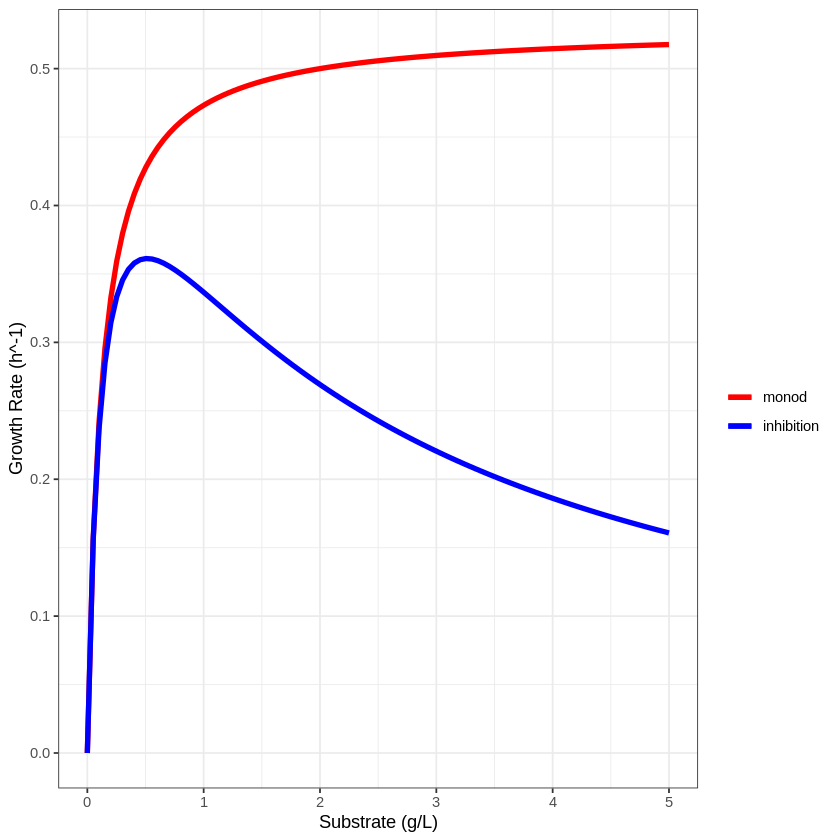

In [ ]:
ggplot(data,aes(s)) +
  geom_line(aes(y=monod, color = "monod"), lwd = 1.5) +
  geom_line(aes(y=inhibition, color = "inhibition"), lwd = 1.5) +
  scale_color_manual("", breaks = c("monod", "inhibition"),
                          values = c("red","blue")) +
  xlab("Substrate (g/L)") +
  ylab("Growth Rate (h^-1)") +
  theme_bw()

Figura 2. Comparación de modelos de inhibición Monod y Substrate para la tasa de crecimiento.

| Monod | Substrate inhibition |
| :------- | :----: | 
| $\mu_{max}$ = 0.53 $h^{-1}$ | $\mu_{max}$ = 0.53 $h^{-1}$ |
| $k_s$ = 0.12 g/L | $k_m$ = 0.12 g/L | 
| Y = 0.4 | $k_I$ = 0.4545 L/g  |
| $s_f$ = 4.0 g/L | $s_f$ = 4.0 g/L |

Nota que el modelo de Monod es una caso especial de (18), con $k_I = 0$ 

# Red para describir el proceso 

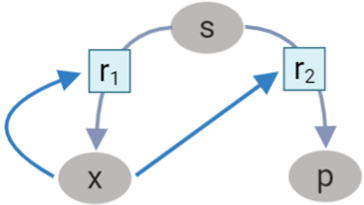

Figura 1. Red del proceso donde se observan las "reacciones" así como las especies que intervienen en estas reacciones y su efecto sobre las reacciones 

En la Fig.1 se observa que para describir el presente proceso se consideran solamente dos reacciones, la reacción $r_1$ da lugar a la generación de biomasa a partir del sustrato, mientras que la reacción $r_2$ da lugar a la generación de producto a partir de sustrato. También se observa que la biomasa ($x$) tiene un efecto positivo sobre ambas reacciones. 

# Análisis de estabilidad  modelo de Monod

Describir los puntos de equilibrio, explicar cómo los obtienen, y si esperan/observan bifurcaciones. Incluir código comentado y procedimiento algebraico. 

En las siguiente secciones se describen con detalle los puntos de equilibrio así como su dependencia con respecto a los parámetros del modelo. Sin embargo, aquí se muestran los dos puntos de equilibrio que se encontraron:

$$\frac{ds}{dt} = 0 \hspace{1cm}  \rightarrow \hspace{1cm} D(s_{f} - s) - r_{2} = 0  \hspace{1cm}  (1)$$
$$\frac{dx}{dt} = 0 \hspace{1cm}  \rightarrow \hspace{1cm}  r_{1} - Dx = 0 \hspace{1cm} (2)$$

Resolviendo la ecuación 1 y 2 para las variables $s$ y $x$, se obtienes los siguientes puntos de equilibrio:



$$P_{1}: \hspace{1cm} \bar{s} = s_{f}, \hspace{0.25cm} \bar{x} = 0$$ \

$$P_{2}: \hspace{1cm} \bar{s} = \frac{Dk}{\mu - D}, \hspace{0.25cm} \bar{x} = \frac{y(Dk + s_{f}(D-\mu))}{D-\mu}$$

Puntos de equilibrio obtenidos con Python.

https://github.com/JuanM-GG/Biologia-de-sistemas/blob/main/puntos_de_equilibrio.ipynb

In [ ]:
# cargar Grind.R
install.packages("rootSolve")
install.packages("FME")
source("Grind.R")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘coda’, ‘minpack.lm’, ‘minqa’


Loading required package: coda



grind.R was sourced


In [ ]:
model <- function(times, state, parms) {
  with(as.list(c(state, parms)), {

    # velocidad de crecimiento (Monod)
    r1 = mu*s/(k+s)*x

    # balances de especies
    ds = -(1/y)*r1 + D*(sf - s)
    dx = r1 - D*x

    return(list(c(ds,dx))) 
  })
}

In [ ]:
# establecer parámetros 
p <- c(mu = 1.2, k = 180, y = 0.1, D = 0.01, sf = 10)

In [ ]:
# condiciones iniciales
s <- c(s = 10, x = 0.1)

In [ ]:
# función para calcular los puntos de equilibrio
steady_state <- function(p) {
  with(as.list(p), {

    # Primer punto de equilibrio
    s1 = sf
    x1 = 0
    ss1 = c(s1 = s1, x1 = x1)

    # segundo punto de equilibrio
    s2 = D*k/(mu - D)
    x2 = y*(D*k + sf*(D - mu))/(D - mu)
    ss2 = c(s2 = s2, x2 = x2)

  return(list(ss1 = round(ss1, 3),ss2 = round(ss2, 3)))
  })
}

¿Cuáles son los puntos de equilibrio para el valor de los parámetros que hemos establecido?

In [ ]:
steady_state(p)

$ss1
s1 x1 
10  0 

$ss2
   s2    x2 
1.513 0.849

Para ver los puntos de equilibrio en un plano de fase, junto con las ceroclinas, usamos la función *plane* y la función *newton*

s         x 
1.6352542 0.8732625

 s  x 
10  0 
Unstable point, eigenvalues:  0.05315789 -0.01 


s  x 
10  0

        s         x 
1.5125855 0.8487414 
Stable point, eigenvalues:  -0.05564379 -0.01 


s         x 
1.5125855 0.8487414

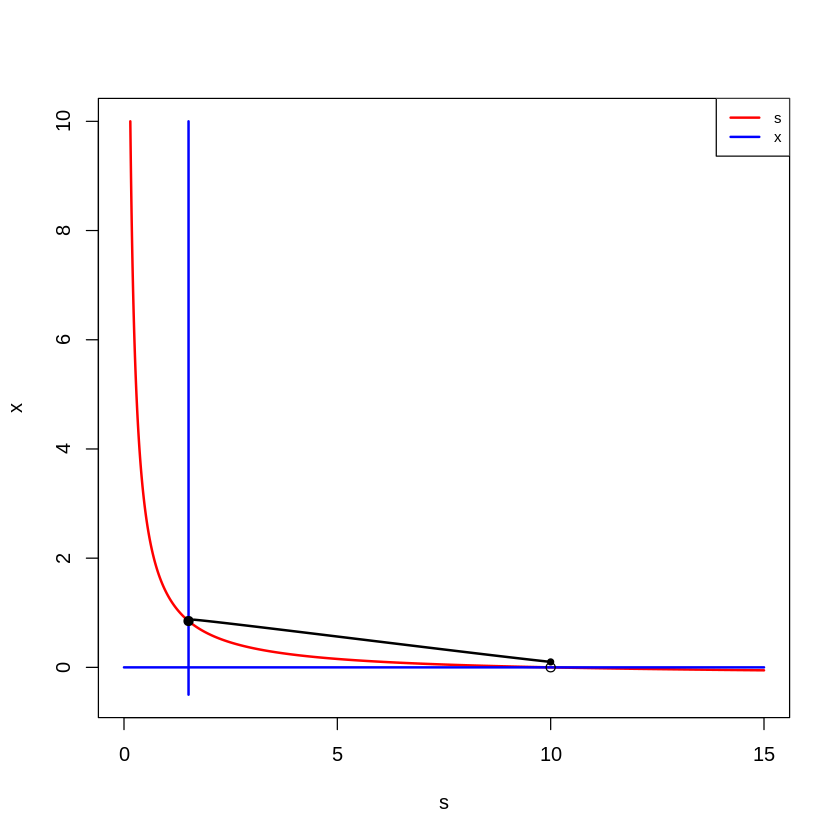

In [ ]:
plane(xmin = 0, xmax = 15, ymin = -0.5, ymax = 10)
run(traject = T)
newton(state = c(s = 10, x = 0), plot = T)
newton(state = c(s = 1.5, x = 0.85), plot = T)

De acuerdo con la la salida anterior. El punto de equilibrio *ss1* $(s = 10, x = 0)$ es inestable, mientras que el punto de equilibrio *ss2* $(s = 1.513, x = 0.849)$ es estable.  

### Efecto del parámetro D sobre el punto de equilibrio

        s         x 
1.5126018 0.8487398 
Stable point, eigenvalues:  -0.05564356 -0.01 
            s             x 
 1.000000e+01 -5.441808e-08 
Unstable point, eigenvalues:  0.0531579 -0.01 


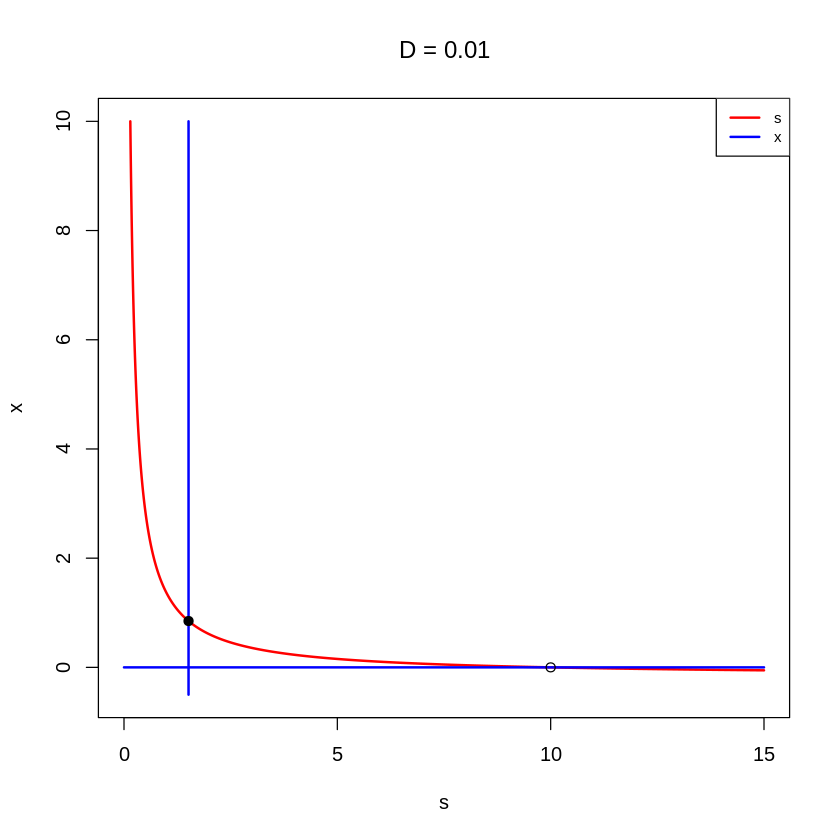

        s         x 
6.2068949 0.3793105 
Stable point, eigenvalues:  -0.04 -0.02362965 
 s  x 
10  0 
Unstable point, eigenvalues:  -0.04 0.02315789 


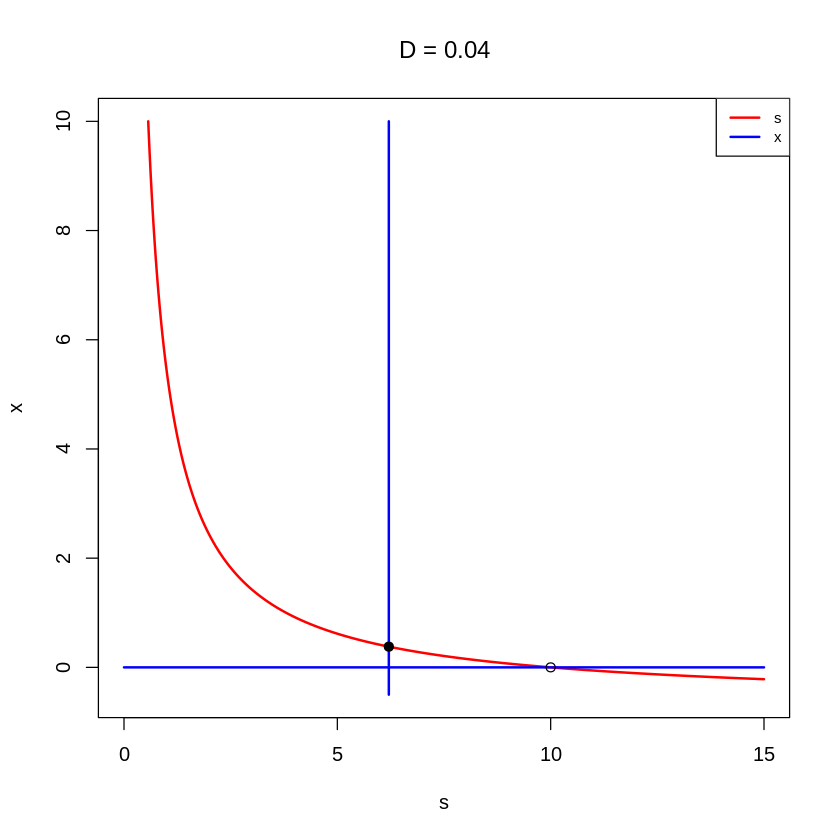

           s            x 
9.999999e+00 7.569379e-08 
Stable point, eigenvalues:  -0.08 -0.01684211 
         s          x 
12.8571458 -0.2857146 
Unstable point, eigenvalues:  -0.08 0.01659263 


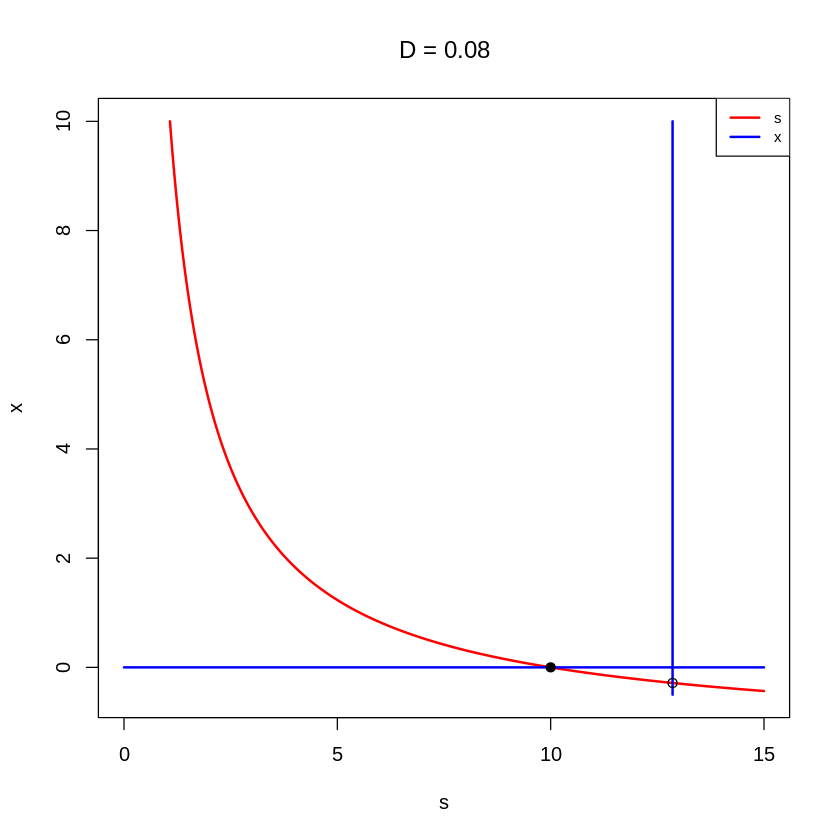

In [ ]:
for (D in c(0.01,0.04,0.08)) {

  p["D"] <- D
  plane(xmin = 0, xmax = 15, ymin = -0.5, ymax = 10, main = paste0("D = ", D))
  newton(state = c(s = 0, x = 1), plot = TRUE)
  newton(state = c(s = 15, x = -0.5), plot = TRUE)
}
p["D"] <- 0.01 # Regresar D a su valor original

En la salida anterior vemos que al variar el valor del parámetro $D$ cambia el valor y la estabilidad de los puntos de equilibrio. Por ejemplo, al pasar de $D = 0.01$ a $D = 0.04$, el valor de $\bar{x}$ pasa de 0.8487 a 0.3779 (g/L), mientras que el valor de $\bar{s}$ pasa de 1.512 a 6.206 (g/L). Una primera observación de lo anterior es que el efecto de cambiar $D$ es mayor sobre $\bar{s}$ que sobre $\bar{x}$. Además, como la estabilidad de los puntos de equilibrio cambia, se espera observar bifurcaciones.  

De los diagramas de plano de fase se puede observar que el valor del parámetro $D$ en el que ocurre la bifurcación es cuando 

$$\frac{kD}{\mu - D} = s_f$$

A partir de aquí un aumento del valor de $D$ ocasiona que el punto de equilibrio *ss1* $(s = s_f, x = 0)$ se vuelva estable y el punto de equilibrio *ss2* $(s = kD/(\mu - D), x = Y_{sx}(s_f-s))$ se vuelva inestable 

### Diagrama de bifurcación 

        s         x 
1.5126050 0.8487395 
Stable point, eigenvalues:  -0.05564352 -0.01 
Starting at D = 0.01 with:
        s         x 
1.5126050 0.8487395 
         s          x 
12.8571569 -0.2857157 
Unstable point, eigenvalues:  -0.08 0.01659275 
Starting at D = 0.08 with:
         s          x 
12.8571569 -0.2857157 


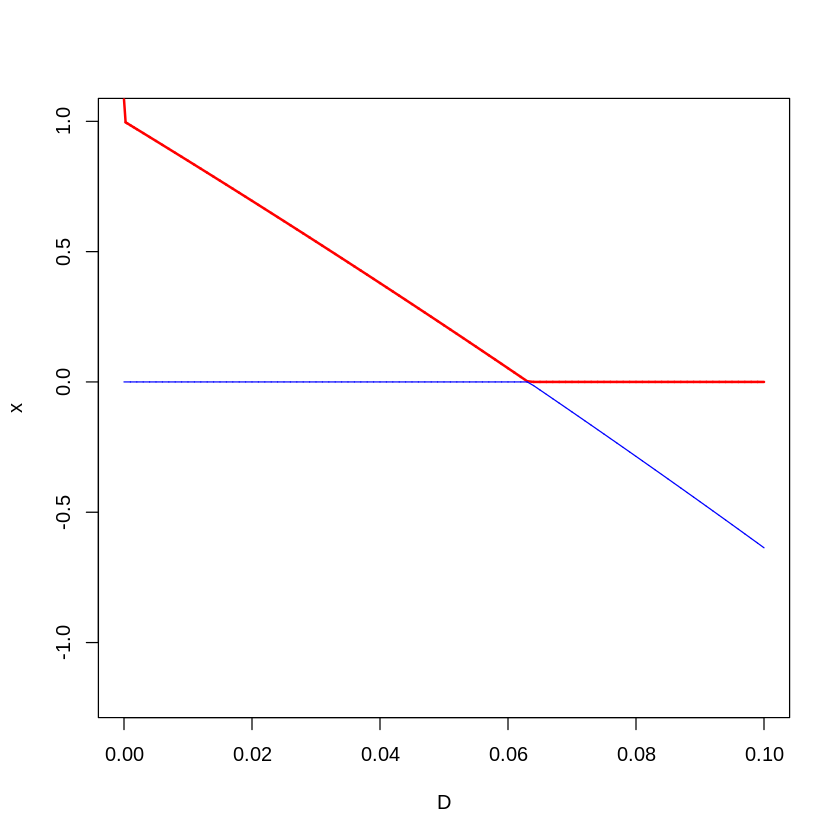

In [ ]:
ss1 <- newton(state = c(s = 1.5, x = 0.84))
continue(state = ss1, parms = p, odes = model, x = "D", 
         step = 0.01, xmin = 0.0, xmax = 0.1, y = "x", ymin = -1.2, ymax = 1)
p["D"] <- 0.08
ss2 <- newton(state = c(s = 13, x = -0.3))
continue(state = ss2, parms = p, odes = model, x = "D", 
         step = 0.01, xmin = 0.0, xmax = 0.1, y = "x", ymin = -1.2, ymax = 1, add = TRUE)
p["D"] <- 0.01

### Restricciones en el punto de equilibrio 

Vemos que el punto de equilibrio 

$$P_{2}: \hspace{1cm} \bar{s} = \frac{Dk}{\mu - D}, \hspace{0.25cm} \bar{x} = \frac{y(Dk + s_{f}(D-\mu))}{D-\mu}$$

requiere que el valor de $D$ sea menor que $\mu$ para tener un valor positivo de sustrato en el equilibrio. Para entender esto podemos graficar la tasa de crecimiento y la tasa de dilución como función de la concentración de sustrato.

In [ ]:
# función para graficar tasas de crecimiento y dilución 
rates <- function(p) {
  with(as.list(p), {

    s <- seq(0,1000,len=1000)
    # tasa de crecimiento 
    mu = mu*s/(k + s)

    # tasa de dilución 
    D = rep(D, length(s))

    data = data.frame(s=s,mu=mu,D=D)

    return(data)

  })
}

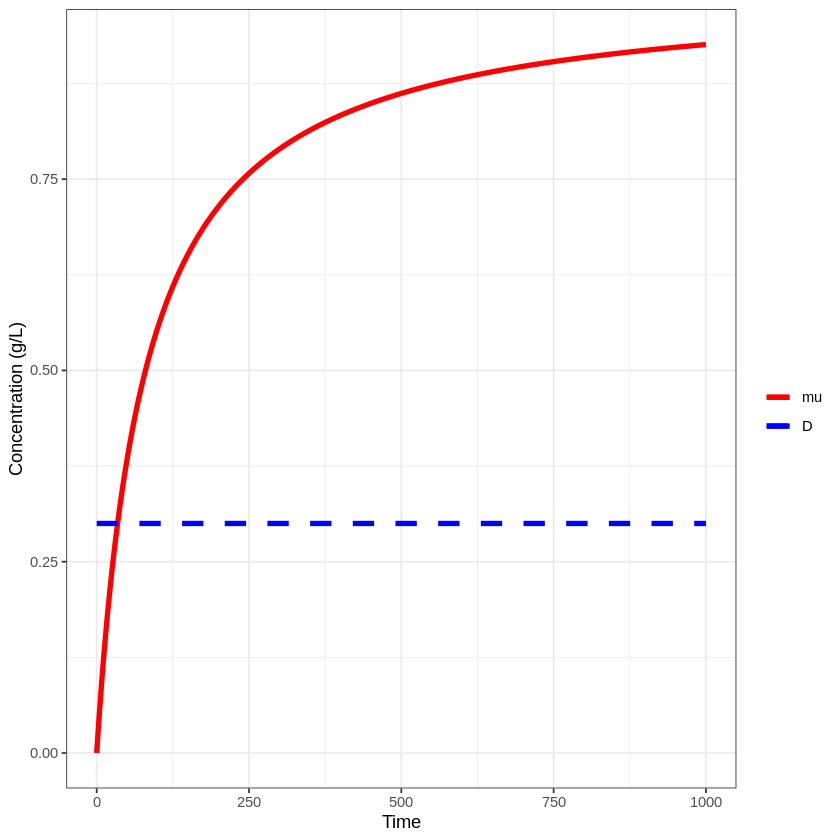

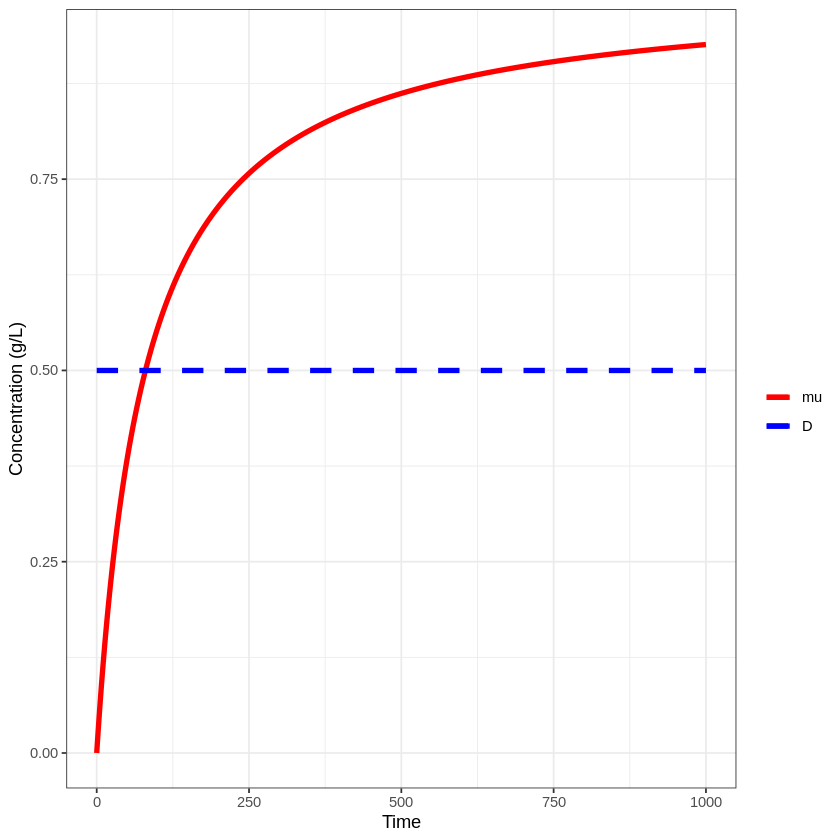

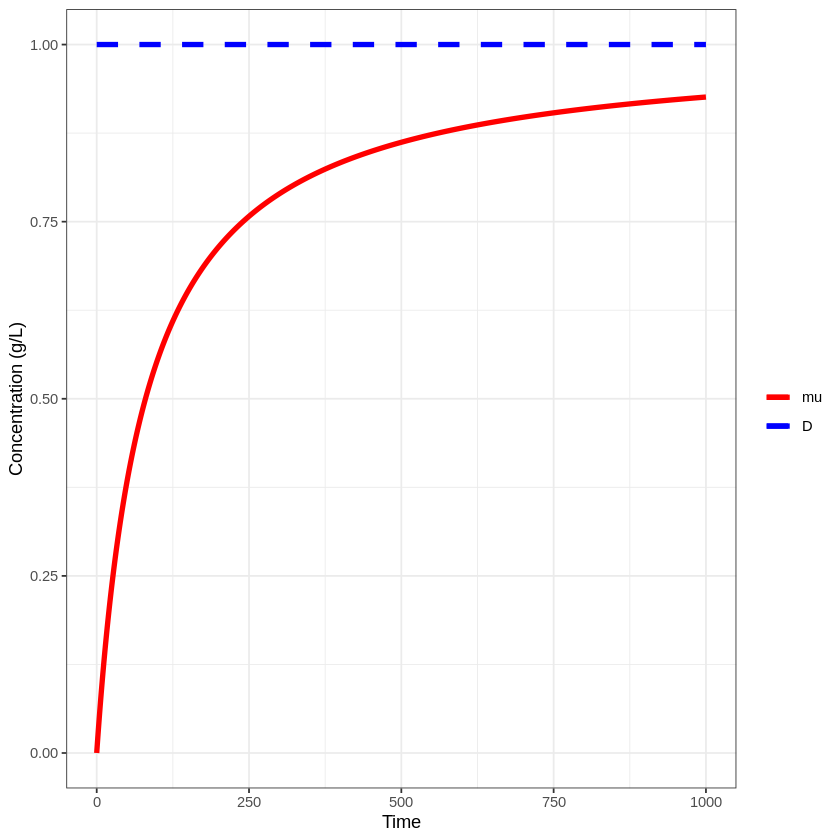

In [ ]:
for (D in c(0.3,0.5,1)) {
  p <- c(mu = 1, k = 80, y = 0.1, D = D, sf = 10)
  data <- rates(p)
  # graficar tasas 
  print(
    ggplot(data,aes(s)) +
    geom_line(aes(y = mu, color = "mu"), lwd = 1.5) +
    geom_line(aes(y = D, color = "D"), lwd = 1.5, lty = 2) + 
    scale_color_manual("", breaks = c("mu","D"), values = c("red", "blue")) +
    xlab("Time") +
    ylab("Concentration (g/L)") +
    theme(title = paste0("D = ", D)) +
    theme_bw()
  )
}

Para que exista un equilibrion en la concentración de biomasa, es decir, $dx/dt = 0$, es necesarion que la tasa de crecimiento iguale a la tasa de dilución, pero como se puede observar en la salida anterior, si la tasa de dilución es demasiado grande, no importa cuando aumente $s$, las tasas no serán iguales. 

#	Análisis dinámico (integración numérica)

Explicar su elección de condiciones iniciales y describir el comportamiento dinámico observado

In [ ]:
model <- function(times, state, parms) {
  with(as.list(c(state, parms)), {

    # velocidad de crecimiento (Monod)
    r1 = mu*s/(k+s)*x

    # balances de especies
    ds = -(1/y)*r1 + D*(sf - s)
    dx = r1 - D*x

    return(list(c(ds,dx))) 
  })
}

In [ ]:
# establecer parámetros 
p <- c(mu = 1.2, k = 180, y = 0.1, D = 0.01, sf = 10)

In [ ]:
# condiciones iniciales
s <- c(s = 10, x = 0.1)

In [ ]:
# tiempo de simulación 
times <- seq(0,100,len=100)

In [ ]:
# resolver EDOs
out <- ode(func = model, y = s, times = times, parms = p, method = "rk4")

In [ ]:
# guardar resultados
out <- as.data.frame(out)

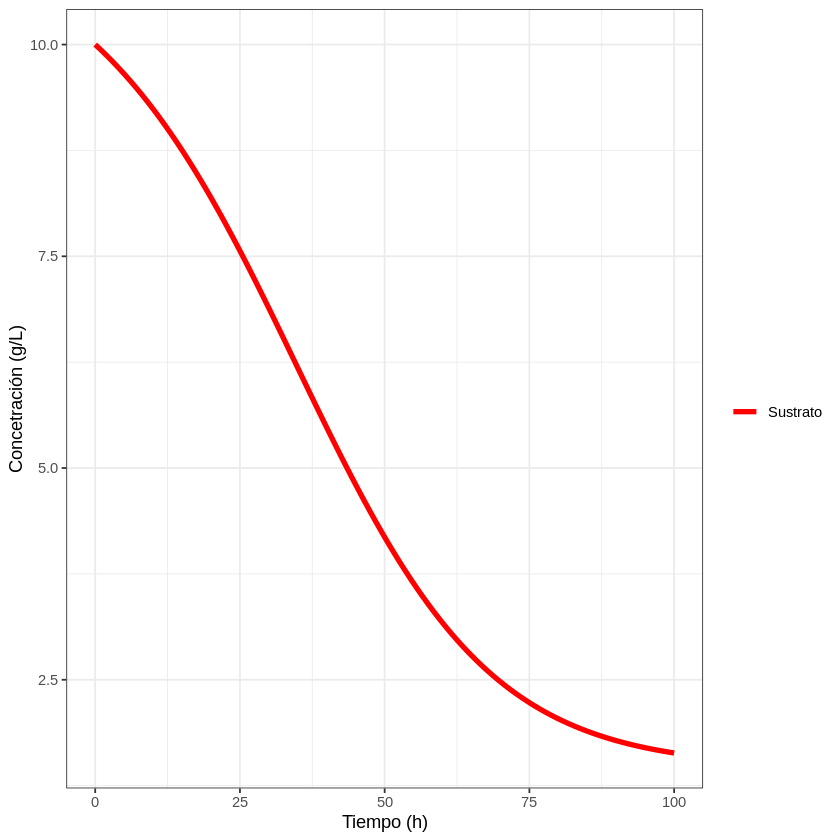

In [ ]:
# mostrar resultados 
ggplot(out, aes(time)) +
  geom_line(aes(y=s, color = "Sustrato"), lwd = 1.5) +
  xlab("Tiempo (h)") +
  ylab("Concetración (g/L)") + 
  scale_color_manual("", breaks = c("Sustrato"), values = c("red")) +
  theme_bw()

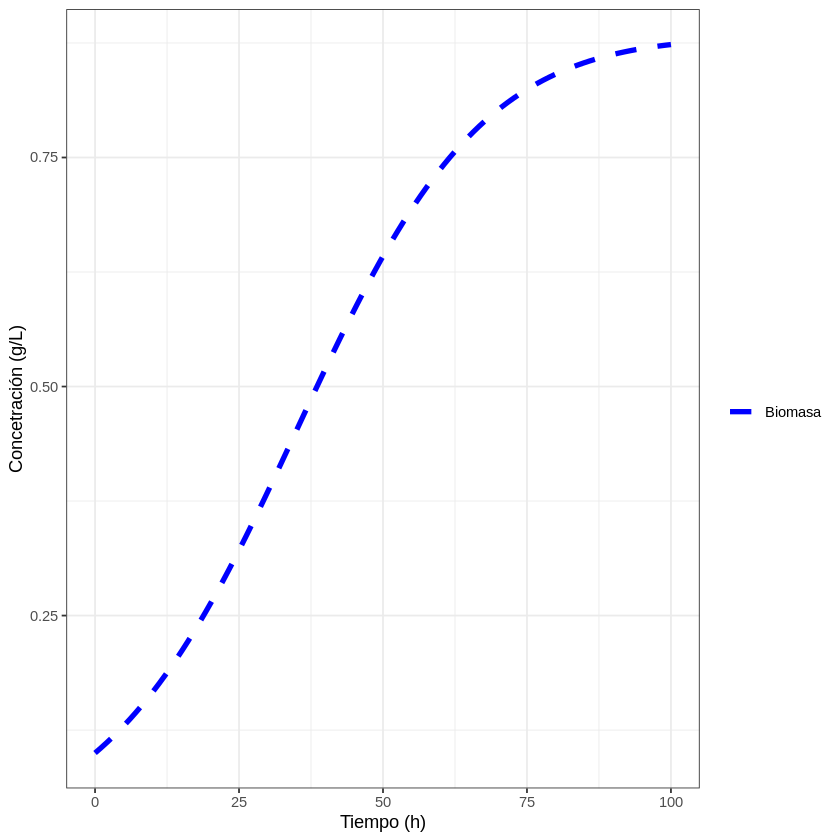

In [ ]:
# mostrar resultados 
ggplot(out, aes(time)) +
  geom_line(aes(y=x, color = "Biomasa"), lwd = 1.5, lty = 2) +
  xlab("Tiempo (h)") +
  ylab("Concetración (g/L)") + 
  scale_color_manual("", breaks = c("Biomasa"), values = c("blue")) +
  theme_bw()

El comportamiento es congruente con el análisis de estabilidad anterior. Se llegó al punto de equilibrio estable no trivial ya que el valor del parámetro $D$ está en el rango en el cual este punto de equilibrio es estable. 

# Optimización 

En esta sección el modelo que se emplea para realizar la optimización describe un tipo de operación tipo lote. Las variables experimentales de las que se tienen mediciones son biomasa ($x$), sustrato ($s$) y producto ($p$). Las fermentaciones se realizan durante un intervalo de tiempo de 60 horas, tomando mediciones cada 4 horas. El interés de realizar la optimización paramétrica es usar los parámetros obtenidos para caracterizar la fermentación y realizar una análisis estadístico  con los parámetros. Del balance de masa se tiene

## Balance de materia para biomasa

$$tasa\ de\ acumulación\ = \ generación$$

<a id='equation-la-se2'></a>
$$
\frac{d(Vx)}{dt} = V r_1 \tag{1}
$$

Dado que el volumen es constante

<a id='equation-la-se2'></a>
$$
\frac{dx}{dt} = r_1 \tag{1}
$$


## Balance de materia para sustrato

$$tasa\ de\ acumulación\ =\ consumo$$

<a id='equation-la-se2'></a>

$$
\frac{d(Vs)}{dt} =  V r_2 \tag{2}
$$

$$
\frac{ds}{dt} =  r_2 
$$



Para describir las velocidades de reacción se emplea el modelo de Monod, por lo tanto 

$$r_1 = \frac{\mu_{max}s}{(k_s + s)}x$$


$$r_2 = -\frac{1}{Y}r_1$$

## Cargar los datos experimentales 

In [ ]:
# cargar los datos 
data <- read.xlsx("IT.xlsx", sheetIndex = 1)
tail(data)

,time,x,p,s
,<dbl>,<dbl>,<dbl>,<dbl>
11,40,3.75,47.84421,1.50570
12,44,3.80,37.60283,NA
13,48,3.80,33.31245,1.60608
14,52,3.80,38.54907,NA
15,56,4.35,30.76595,1.30494
16,60,5.20,26.35858,1.40532


In [ ]:
# revisar los datos 
str(data)

'data.frame':	16 obs. of  4 variables:
 $ time: num  0 4 8 12 16 20 24 28 32 36 ...
 $ x   : num  0.2 0.25 1.15 1.65 2.6 ...
 $ p   : num  2.5 13.9 27.3 28.8 31.8 ...
 $ s   : num  44.9 NA 37 NA 29.1 ...


### Comparar modelo con datos experimentales 

In [ ]:
# establecer modelo para reactor tipo lote 
model <- function(time, state, parms) {
  with(as.list(c(state, parms)), {

    # tasas de crecimiento de biomasa
    mu = mu_max*(s/(ks+s))

    # velocidad de crecimiento de biomasa
    rx = mu*x

    # velocidad de consumo de sustrato
    rs = (1/yxs)*rx
    
    # velocidad de generación de producto
    rp = ypx*rx

    # balances de materia
    dsdt <- -rs
    dxdt <- rx
    dpdt <-  rp

    return(list(c(dsdt, dxdt, dpdt)))
  })
}

In [ ]:
# parámetros del modelo
p <- c(mu_max = 1.2, ks = 280, yxs = 0.2, ypx = 4)

In [ ]:
# condiciones iniciales
s <- c(s = data$s[1], x = data$x[1], p = data$p[1])

In [ ]:
# tiempo de integración 
times <- seq(0,60,4)

In [ ]:
out <- ode(y=s, times = times, parms = p, func = model, method = "rk4")
out <- as.data.frame(out)

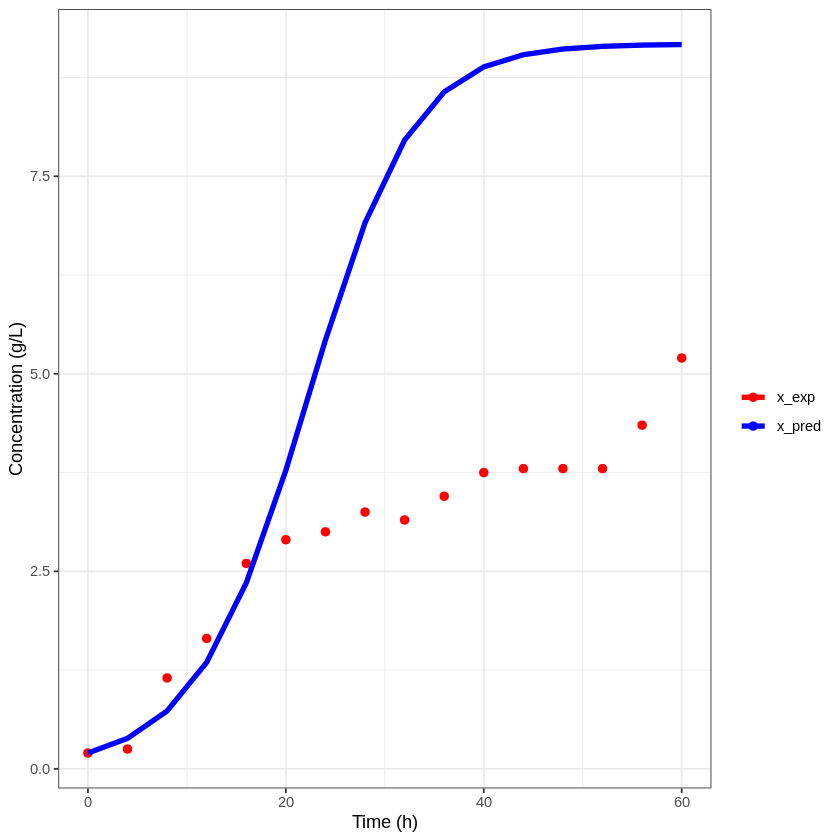

In [ ]:
# comparamos modelo y datos experimentales (biomasa)
ggplot(data, aes(x=time)) +
  geom_point(aes(y = x, color = "x_exp"), size = 2) +
  geom_line(data = out, aes(y = x, color = "x_pred"), lwd = 1.5) +
  scale_color_manual("", breaks = c("x_exp", "x_pred"), values = c("red", "blue")) +
  xlab("Time (h)") +
  ylab("Concentration (g/L)") + 
  theme_bw()

Warning message:
“Removed 7 rows containing missing values (geom_point).”


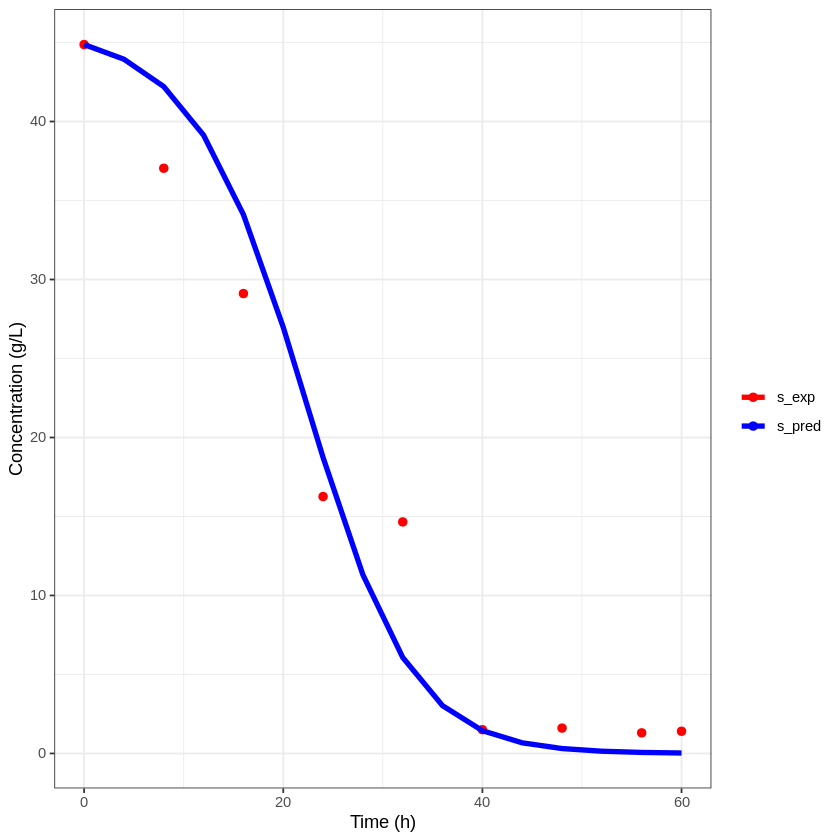

In [ ]:
# comparamos modelo y datos experimentales (sustrato)
ggplot(data, aes(x=time)) +
  geom_point(aes(y = s, color = "s_exp"), size = 2) +
  geom_line(data = out, aes(y = s, color = "s_pred"), lwd = 1.5) +
  scale_color_manual("", breaks = c("s_exp", "s_pred"), values = c("red", "blue")) +
  xlab("Time (h)") +
  ylab("Concentration (g/L)") + 
  theme_bw()

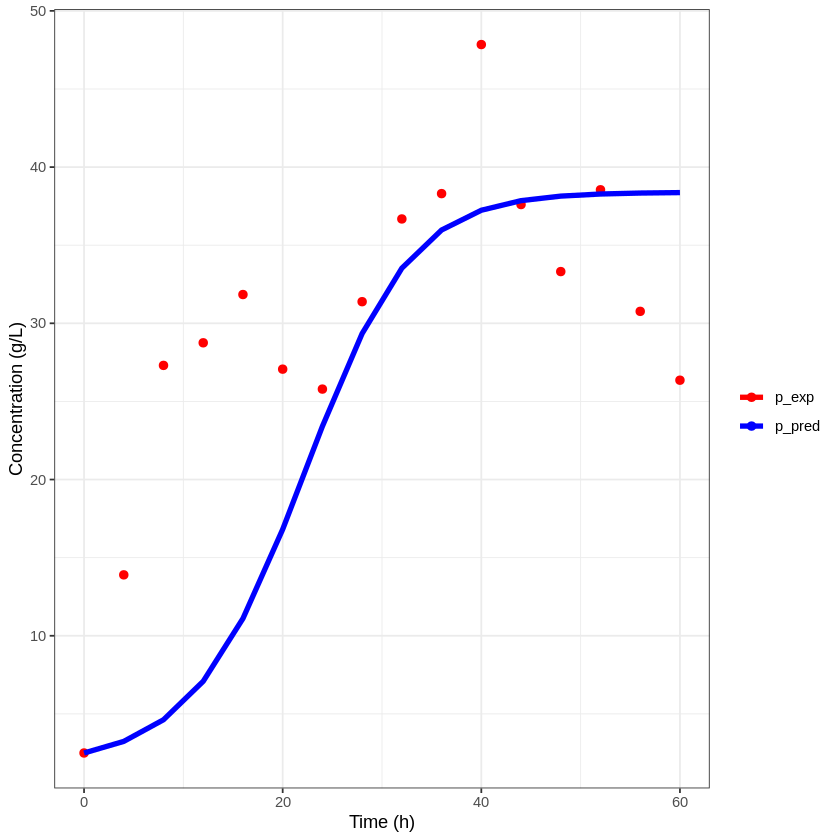

In [ ]:
# comparamos modelo y datos experimentales (producto)
ggplot(data, aes(x=time)) +
  geom_point(aes(y = p, color = "p_exp"), size = 2) +
  geom_line(data = out, aes(y = p, color = "p_pred"), lwd = 1.5) +
  scale_color_manual("", breaks = c("p_exp", "p_pred"), values = c("red", "blue")) +
  xlab("Time (h)") +
  ylab("Concentration (g/L)") + 
  theme_bw()

## Establecer función objetivo 

En la optimización paramétrica lo más común es definir la función objetivo como la función de costo:

$$F(p) = \sum_{i = 1}^{n} \left( \hat{x} - x_{exp} \right)^{2}$$

$n$ es el número de observaciones en nuestros datos, $\hat{x}$ representa las predicciones hechas con el modelo y $x_{exp}$ los datos experimentales. 

In [ ]:
cost <- function(x, data) {

  names(x) <- names(p)
  out <- ode(y = c(s = data$s[1], x = data$x[1], p = data$p[1]), 
            times = times, 
            parms = x, 
            func = model, 
            method = "rk4")

  f <- -modCost(model = out, obs = data)$model
  return(f)
}

Esta función recibe un vector de parámetros, le asigna los nombres del vector p, y utiliza los valores contenidos en el vector para simular el modelo y comparar con los datos expermientales. El valor negativo es debido a que la función `ga()` que realiza la optimización busca maximizar la función ` cost()`. 

In [ ]:
cost(p, data)

[1] -2351.144

### Algoritmo Genético 

In [ ]:
GA1 <- ga(type = "real-valued",
      fitness = cost, 
      data = data,
      lower = rep(0, length(p)),
      upper = 2*p,
      popSize = 50,
      pcrossover = ,
      pmutation = ,
      elitism = ,
      maxiter = 100,
      maxFitness = )

In [ ]:
cat("solución: ", GA1@solution, "\n")
cat("error: ", GA1@fitnessValue)

solución:  1.946213 364.8109 0.1131599 6.576579 
error:  -1626.618

### Comparar simulación con parámetros óptimos y datos experimentales

In [ ]:
# parámetros para la simulación 
p_opt <- GA1@solution[1,]

In [ ]:
# condiciones iniciales
s <- c(s = data$s[1], x = data$x[1], p = data$p[1])

In [ ]:
# tiempo de integración 
times <- seq(0,60,4)

In [ ]:
out <- ode(y=s, times = times, parms = p_opt, func = model, method = "rk4")
out <- as.data.frame(out)

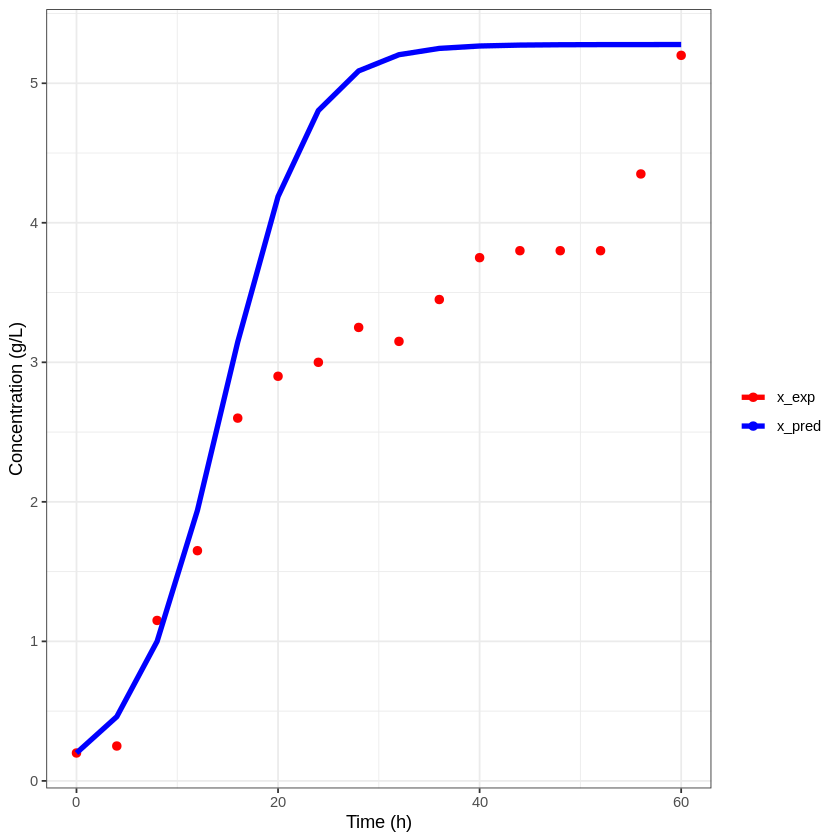

In [ ]:
# comparamos modelo y datos experimentales (biomasa)
ggplot(data, aes(x=time)) +
  geom_point(aes(y = x, color = "x_exp"), size = 2) +
  geom_line(data = out, aes(y = x, color = "x_pred"), lwd = 1.5) +
  scale_color_manual("", breaks = c("x_exp", "x_pred"), values = c("red", "blue")) +
  xlab("Time (h)") +
  ylab("Concentration (g/L)") + 
  theme_bw()

Warning message:
“Removed 7 rows containing missing values (geom_point).”


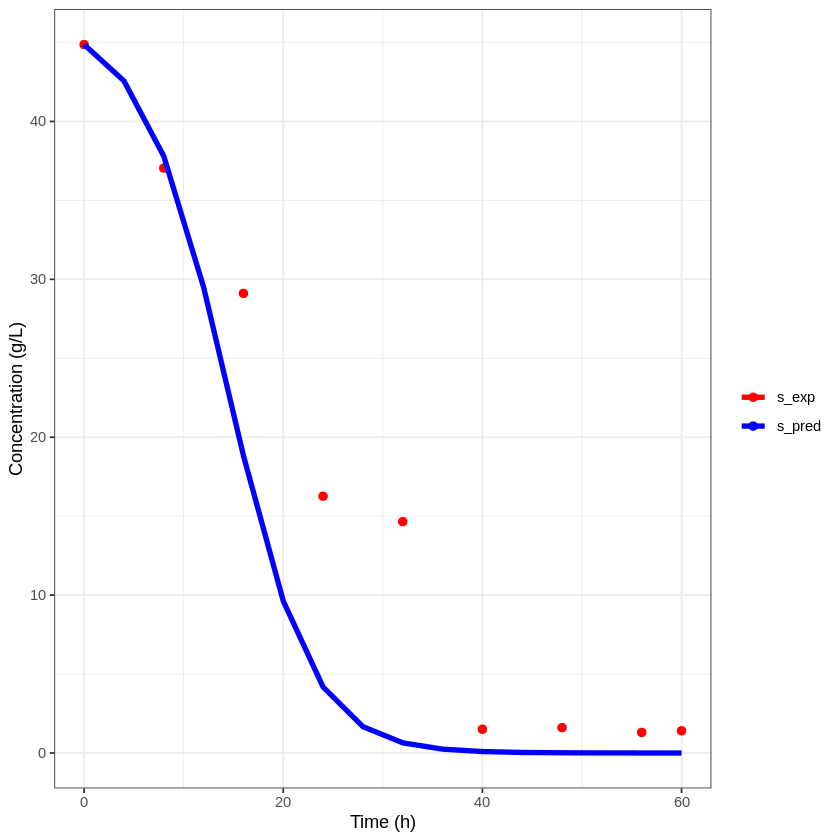

In [ ]:
# comparamos modelo y datos experimentales (sustrato)
ggplot(data, aes(x=time)) +
  geom_point(aes(y = s, color = "s_exp"), size = 2) +
  geom_line(data = out, aes(y = s, color = "s_pred"), lwd = 1.5) +
  scale_color_manual("", breaks = c("s_exp", "s_pred"), values = c("red", "blue")) +
  xlab("Time (h)") +
  ylab("Concentration (g/L)") + 
  theme_bw()

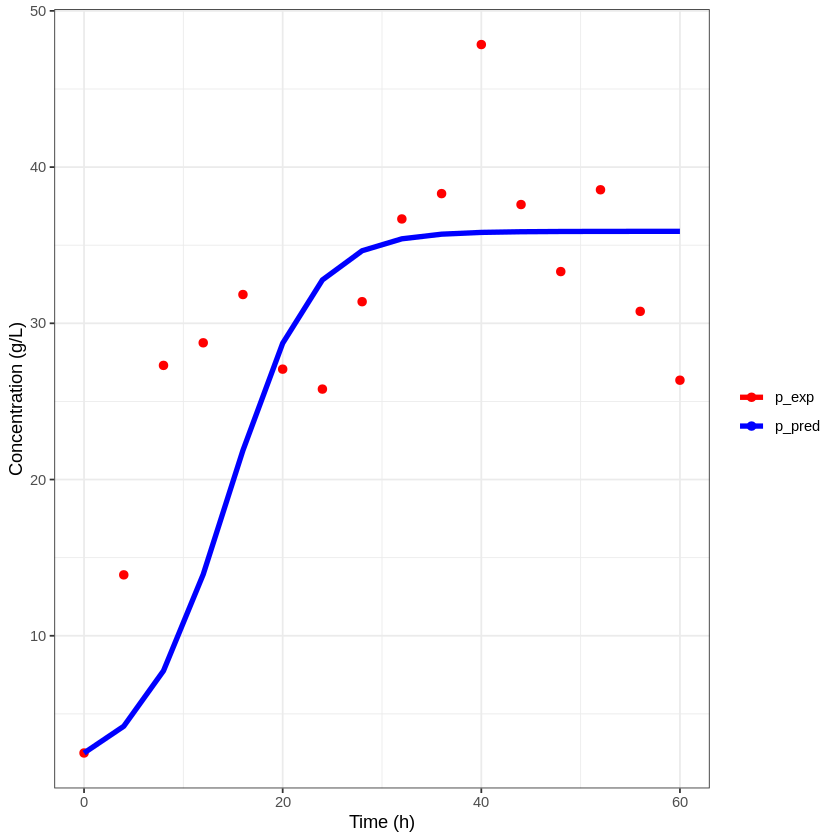

In [ ]:
# comparamos modelo y datos experimentales (producto)
ggplot(data, aes(x=time)) +
  geom_point(aes(y = p, color = "p_exp"), size = 2) +
  geom_line(data = out, aes(y = p, color = "p_pred"), lwd = 1.5) +
  scale_color_manual("", breaks = c("p_exp", "p_pred"), values = c("red", "blue")) +
  xlab("Time (h)") +
  ylab("Concentration (g/L)") + 
  theme_bw()

Tabla2. Parámetros encontrados al hacer la optimización

| Parámetro | Valor |
| :------- | :----: | 
| $\mu_{max}$ | $1.9494 h^{-1}$  |
| $k_s$  | $364.8109$ g/L | 
| $Y_{xs}$ | $0.11315$ |
| $Y_{px}$ | $6.5765$ |